In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import xarray as xr

In [12]:
ds = xr.open_dataset('../ETOPO1_Bed_g_gdal.grd')

In [13]:
ds

<xarray.Dataset>
Dimensions:    (side: 2, xysize: 233312401)
Dimensions without coordinates: side, xysize
Data variables:
    x_range    (side) float64 ...
    y_range    (side) float64 ...
    z_range    (side) float64 ...
    spacing    (side) float64 ...
    dimension  (side) int32 ...
    z          (xysize) float64 ...
Attributes:
    title:    ETOPO1_Bed_g_gmt4.grd
    source:   grdreformat -V ETOPO1_Bed_g_gmt4.grd ETOPO1_Bed_g_gdal.grd=ci

In [14]:
Z_2D = ds.z.values.reshape(ds.dimension.values[1], ds.dimension.values[0])

In [15]:
Z_2D

array([[-4228., -4228., -4228., ..., -4228., -4228., -4228.],
       [-4229., -4229., -4229., ..., -4229., -4229., -4229.],
       [-4228., -4227., -4228., ..., -4228., -4228., -4228.],
       ...,
       [  -62.,   -62.,   -62., ...,   -62.,   -62.,   -62.],
       [  -60.,   -60.,   -60., ...,   -60.,   -60.,   -60.],
       [  -56.,   -56.,   -56., ...,   -56.,   -56.,   -56.]])

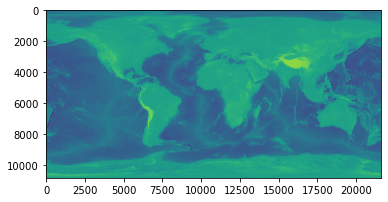

In [22]:
plt.imshow(Z_2D, aspect='equal')

In [16]:
lon = np.arange(-180, 180.001, ds.spacing.values[0])
lat = np.arange(90, -90.001, -ds.spacing.values[0])
print(lon.size)
print(lat.size)

xx, yy = np.meshgrid(lon, lat)

21601
10801


In [17]:
ds = xr.Dataset(data_vars=dict(topography=(['lat', 'lon'], Z_2D)),
                coords=dict(lon=(['lon'], lon), lat=(['lat'], lat)))

In [19]:
ds.to_netcdf('ETOPO1_gdal.nc')

In [149]:
URlat = np.where(lat <= 18.5)[0][0]
LLlon = np.where(lon >= -157)[0][0]
LLlat = np.where(lat <= 20.5)[0][0]
URlon = np.where(lon >= -154)[0][0]

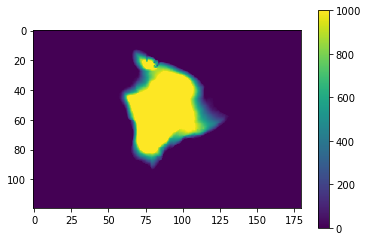

In [150]:
cf = plt.imshow(Z_2D[LLlat:URlat, LLlon:URlon], aspect='equal', vmin=0, vmax=1000)
plt.colorbar(cf)

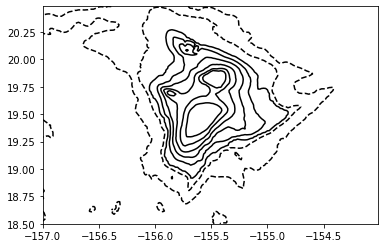

In [151]:
plt.contour(xx[LLlat:URlat, LLlon:URlon], yy[LLlat:URlat, LLlon:URlon],
            Z_2D[LLlat:URlat, LLlon:URlon], [-3000, -1000, 0, 500, 1000, 1500, 2000, 2500], colors='black')

In [152]:
np.savetxt('big_island_hawaii.dat', Z_2D[LLlat:URlat, LLlon:URlon])

In [153]:
dat = np.loadtxt('big_island_hawaii.dat')

In [155]:
xx[LLlat:URlat, LLlon:URlon]

array([[-157.        , -156.98333333, -156.96666667, ..., -154.05      ,
        -154.03333333, -154.01666667],
       [-157.        , -156.98333333, -156.96666667, ..., -154.05      ,
        -154.03333333, -154.01666667],
       [-157.        , -156.98333333, -156.96666667, ..., -154.05      ,
        -154.03333333, -154.01666667],
       ...,
       [-157.        , -156.98333333, -156.96666667, ..., -154.05      ,
        -154.03333333, -154.01666667],
       [-157.        , -156.98333333, -156.96666667, ..., -154.05      ,
        -154.03333333, -154.01666667],
       [-157.        , -156.98333333, -156.96666667, ..., -154.05      ,
        -154.03333333, -154.01666667]])

In [156]:
yy[LLlat:URlat, LLlon:URlon]

array([[20.48333333, 20.48333333, 20.48333333, ..., 20.48333333,
        20.48333333, 20.48333333],
       [20.46666667, 20.46666667, 20.46666667, ..., 20.46666667,
        20.46666667, 20.46666667],
       [20.45      , 20.45      , 20.45      , ..., 20.45      ,
        20.45      , 20.45      ],
       ...,
       [18.53333333, 18.53333333, 18.53333333, ..., 18.53333333,
        18.53333333, 18.53333333],
       [18.51666667, 18.51666667, 18.51666667, ..., 18.51666667,
        18.51666667, 18.51666667],
       [18.5       , 18.5       , 18.5       , ..., 18.5       ,
        18.5       , 18.5       ]])

In [ ]:
da = xr.open_rasterio('MCD12C1_T1_2011-01-01_rgb_3600x1800.TIFF')
ds = xr.Dataset({'landuse': da[0]}, attrs=da.attrs)
print(ds)

In [ ]:
ds.to_netcdf('landuse_2011.nc', mode='w')